# Time Series Analysis of 'Milk' in Koramangala

## Objective
To analyze the hourly order volume of 'Milk' in the Koramangala location, focusing on exploratory data analysis (EDA) to uncover patterns, trends, and seasonality.

## What is Time Series?

A time series is a sequence of data points recorded at successive time intervals. It is widely used in domains like finance, retail, and weather forecasting.

**Key Components:**
- **Trend:** Long-term movement in the data.
- **Seasonality:** Repeating patterns over fixed intervals (e.g., daily or weekly).
- **Noise:** Random variations that cannot be explained by trend or seasonality.

In [2]:
!pip install statsmodels

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.0/9.9 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.0/9.9 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/9.9 MB 476.3 kB/s eta 0:00:21
   - -------------------------------------- 0.3/9.9 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.9 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.9 MB 2.4 MB/s eta 0:00:04
   --- ---------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Step 1: Data Preparation

We'll filter the dataset to focus on the product 'Milk' in the Koramangala location. The data will be aggregated by DateTime for analysis.

In [5]:
# Load the dataset
forecasting_data = pd.read_csv('../data/processed/dataset.csv')

# Filter for the product 'Milk' and location 'Koramangala'
product_data = forecasting_data[
    (forecasting_data['Product'] == 'Milk') &
    (forecasting_data['Location'] == 'Koramangala')
]

# Combine Date and Hour into a DateTime column
product_data['DateTime'] = pd.to_datetime(product_data['Date']) + pd.to_timedelta(product_data['Hour'], unit='h')

# Aggregate data by DateTime
aggregated_data = product_data.groupby('DateTime')['Order_Volume'].sum()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_48448\3151598662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['DateTime'] = pd.to_datetime(product_data['Date']) + pd.to_timedelta(product_data['Hour'], unit='h')


## Step 2: Exploratory Data Analysis (EDA)

### Time Series Plot
Visualizing the data helps identify patterns like trends, seasonality, and anomalies.

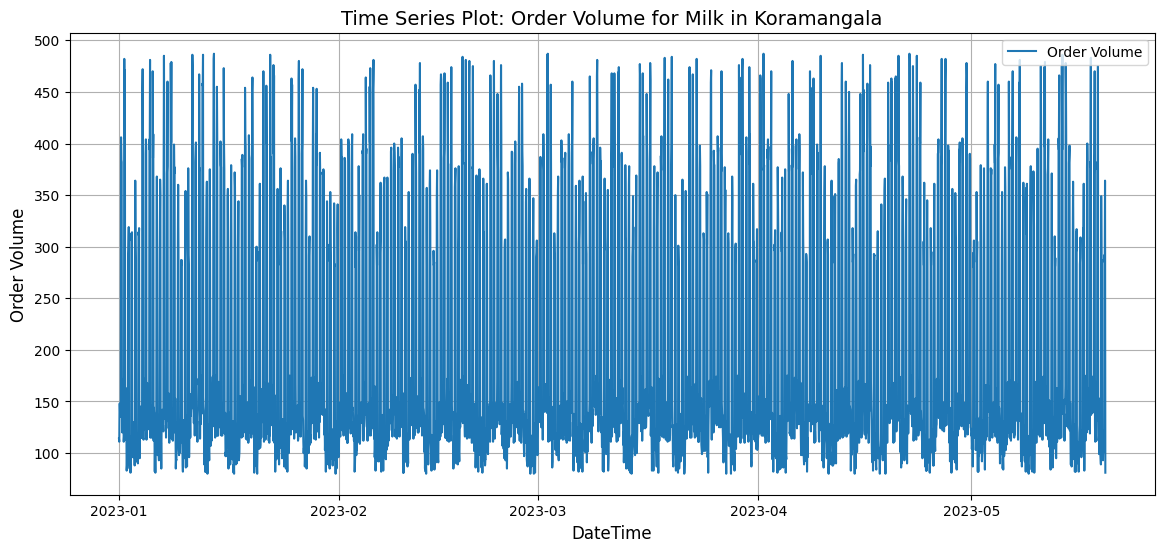

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(aggregated_data, label='Order Volume')
plt.title('Time Series Plot: Order Volume for Milk in Koramangala', fontsize=14)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Order Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()

## Step 3: Seasonal Decomposition

Seasonal decomposition separates the time series into three components:
- **Trend:** Long-term movement.
- **Seasonality:** Repeating patterns over regular intervals.
- **Residuals:** Remaining noise.

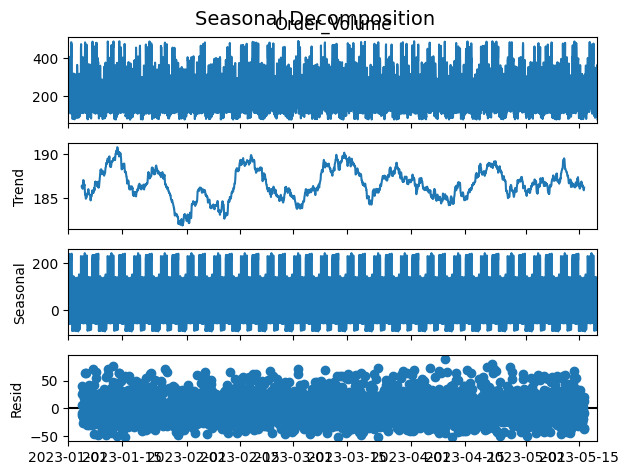

In [7]:
decomposition = seasonal_decompose(aggregated_data, model='additive', period=24*7)
decomposition.plot()
plt.suptitle('Seasonal Decomposition', fontsize=14)
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_48448\238969922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Week_Number'] = product_data['DateTime'].dt.isocalendar().week


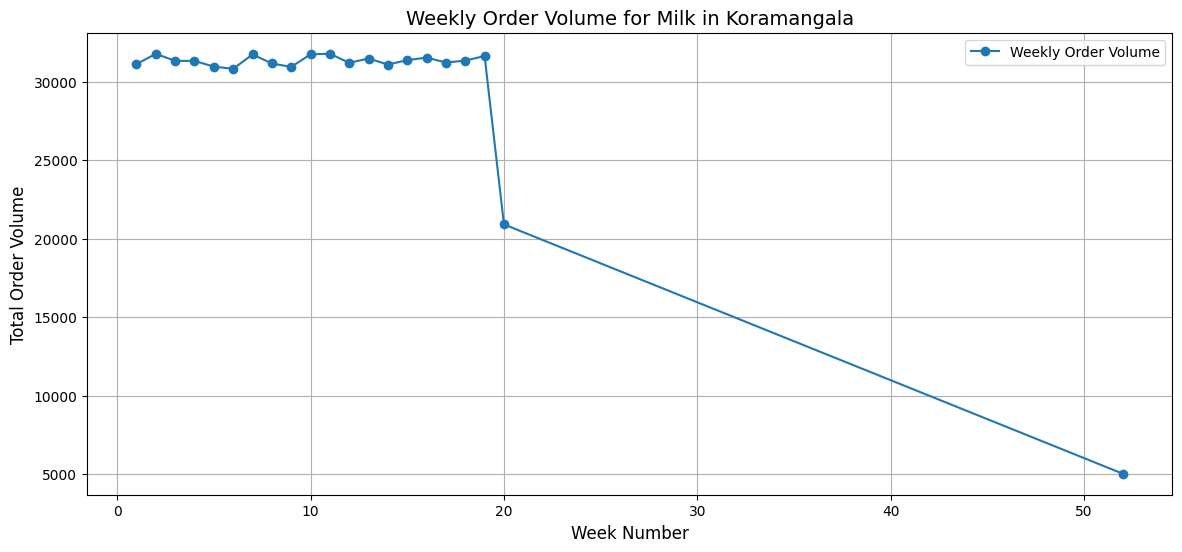

In [12]:
# Step 1: Aggregate Data Weekly
product_data['Week_Number'] = product_data['DateTime'].dt.isocalendar().week
weekly_aggregated_data = product_data.groupby('Week_Number')['Order_Volume'].sum()

# Step 2: Visualize Weekly Aggregated Data
plt.figure(figsize=(14, 6))
plt.plot(weekly_aggregated_data.index, weekly_aggregated_data.values, marker='o', label="Weekly Order Volume")
plt.title("Weekly Order Volume for Milk in Koramangala", fontsize=14)
plt.xlabel("Week Number", fontsize=12)
plt.ylabel("Total Order Volume", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

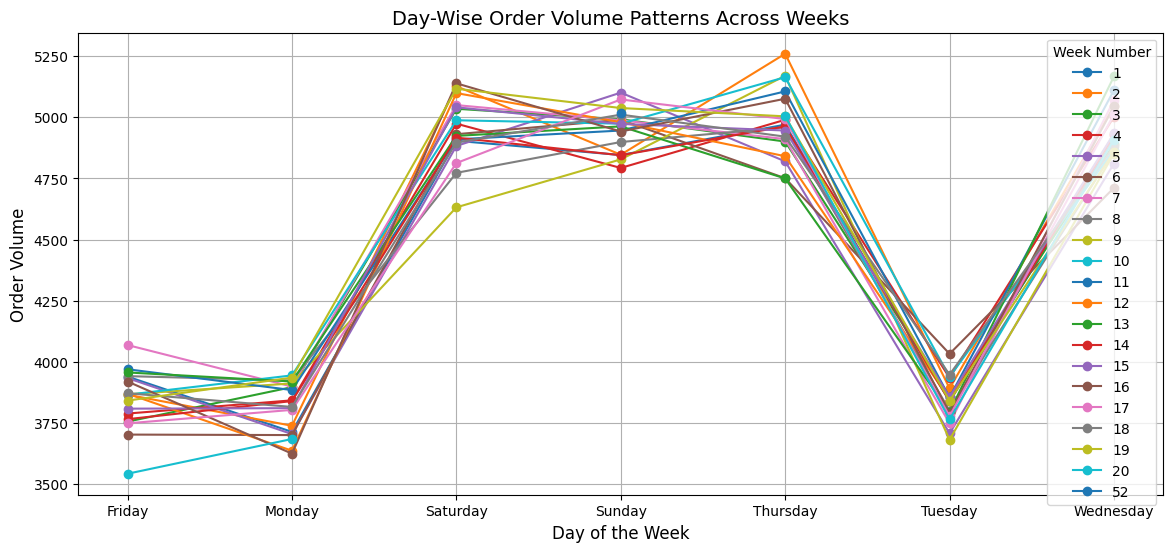

In [13]:
# Step 3: Analyze Day-Wise Patterns
daywise_aggregated_data = product_data.groupby(['Week_Number', 'Day_of_Week'])['Order_Volume'].sum().reset_index()

# Pivot for visualization
daywise_pivot = daywise_aggregated_data.pivot(index='Day_of_Week', columns='Week_Number', values='Order_Volume')

# Plot Day-Wise Patterns
daywise_pivot.plot(kind='line', figsize=(14, 6), marker='o')
plt.title("Day-Wise Order Volume Patterns Across Weeks", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Order Volume", fontsize=12)
plt.grid(True)
plt.legend(title="Week Number")
plt.show()

## Key Observations from Weekly Patterns

1. **Weekly Peaks and Troughs:**
   - **Sunday** generally shows the highest order volume across weeks, indicating increased demand during weekends.
   - **Tuesday** exhibits a noticeable dip, possibly representing lower midweek activity.

2. **Consistent Patterns Across Weeks:**
   - The lines for different weeks follow a similar pattern, confirming that the weekly seasonality is consistent.
   - Small variations between weeks might be due to external factors (e.g., weather, traffic, promotions).

3. **Weekend Impact:**
   - The rise in order volume during Saturdays and Sundays suggests higher engagement during weekends.

4. **Variability:**
   - Some weeks show deviations (e.g., unusually high or low volumes) on certain days, indicating potential outliers or special events.


### 1. Analyze Individual Days

**Goal**:<br>
Focus on specific days (e.g., Sundays or Tuesdays) to understand what drives higher or lower demand.

**Steps**:
- Aggregate order volume data across all weeks for individual days of the week.
- Compare the average order volumes for the chosen days across different weeks.
- Highlight potential drivers (e.g., high/low demand factors).

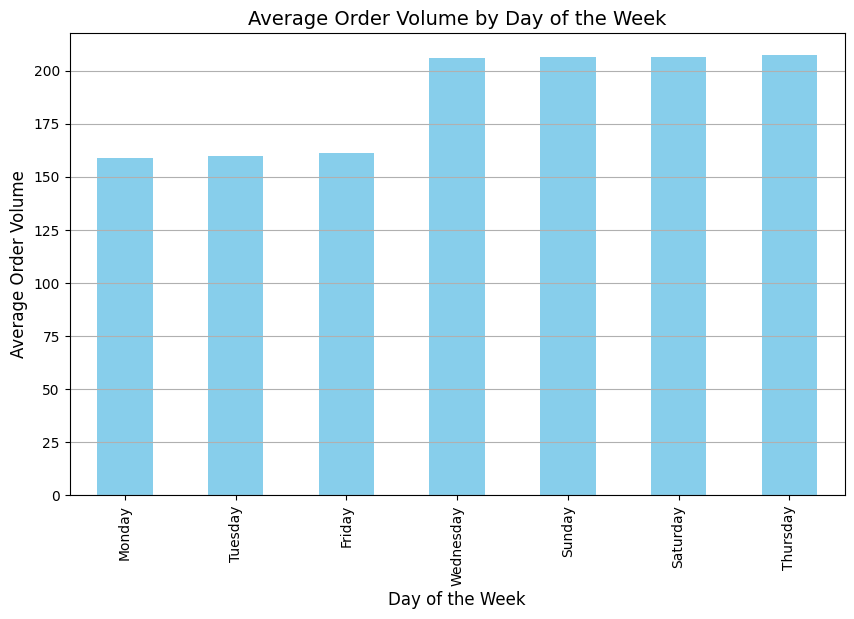

In [15]:
# Aggregate data by Day_of_Week
daywise_avg = product_data.groupby('Day_of_Week')['Order_Volume'].mean().sort_values()

# Plot average order volumes for each day of the week
plt.figure(figsize=(10, 6))
daywise_avg.plot(kind='bar', color='skyblue')
plt.title("Average Order Volume by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Order Volume", fontsize=12)
plt.grid(axis='y')
plt.show()


### 2. External Factor Correlation

**Goal**:<br>
Overlay external factors like weather, traffic, or promotions to examine their influence on weekly patterns.

**Steps**:
- Group data by external factors (Weather, Traffic, Promotion) for specific days (e.g., Sundays or Tuesdays).
- Compare the average order volume for each external factor.


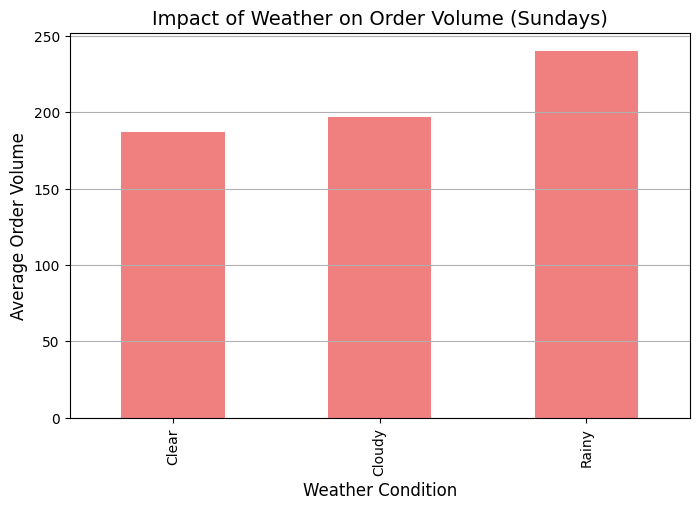

In [16]:
# Correlation between external factors and order volume on Sundays
sunday_data = product_data[product_data['Day_of_Week'] == 'Sunday']

# Average order volume by Weather on Sundays
weather_corr = sunday_data.groupby('Weather')['Order_Volume'].mean()
plt.figure(figsize=(8, 5))
weather_corr.plot(kind='bar', color='lightcoral')
plt.title("Impact of Weather on Order Volume (Sundays)", fontsize=14)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Average Order Volume", fontsize=12)
plt.grid(axis='y')
plt.show()

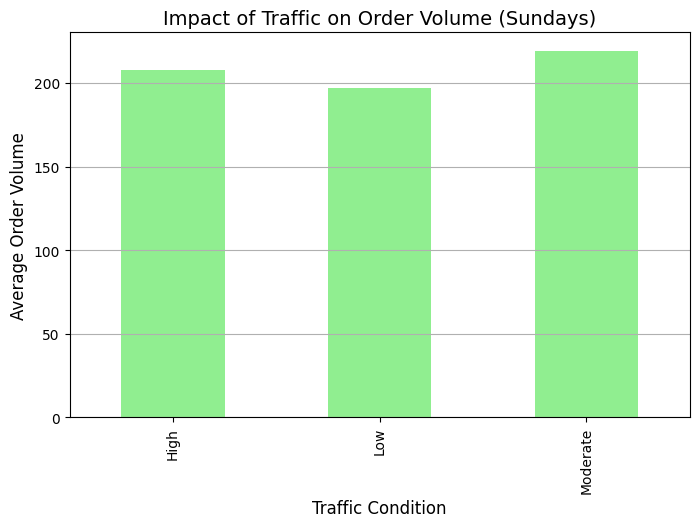

In [17]:
# Average order volume by Traffic on Sundays
traffic_corr = sunday_data.groupby('Traffic')['Order_Volume'].mean()
plt.figure(figsize=(8, 5))
traffic_corr.plot(kind='bar', color='lightgreen')
plt.title("Impact of Traffic on Order Volume (Sundays)", fontsize=14)
plt.xlabel("Traffic Condition", fontsize=12)
plt.ylabel("Average Order Volume", fontsize=12)
plt.grid(axis='y')
plt.show()

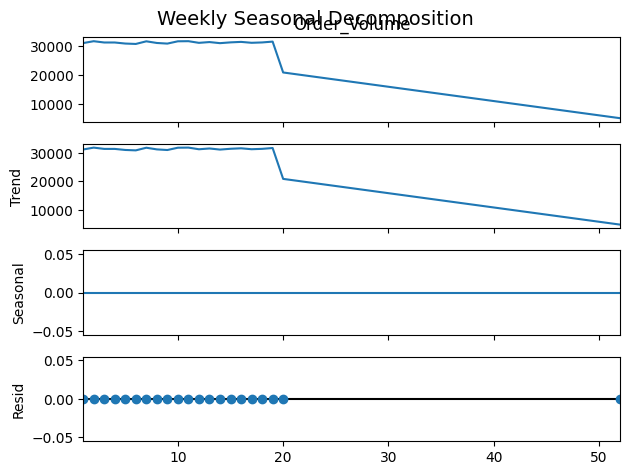

In [14]:
# Step 4: Weekly Seasonal Decomposition
weekly_decomposition = seasonal_decompose(weekly_aggregated_data, model='additive', period=1)
weekly_decomposition.plot()
plt.suptitle("Weekly Seasonal Decomposition", fontsize=14)
plt.show()

## Step 4: Factor Analysis

The dataset contains additional factors like weather, traffic, and promotions. Let's explore their impact on order volume.

### 4.1 Impact of Weather on Order Volume

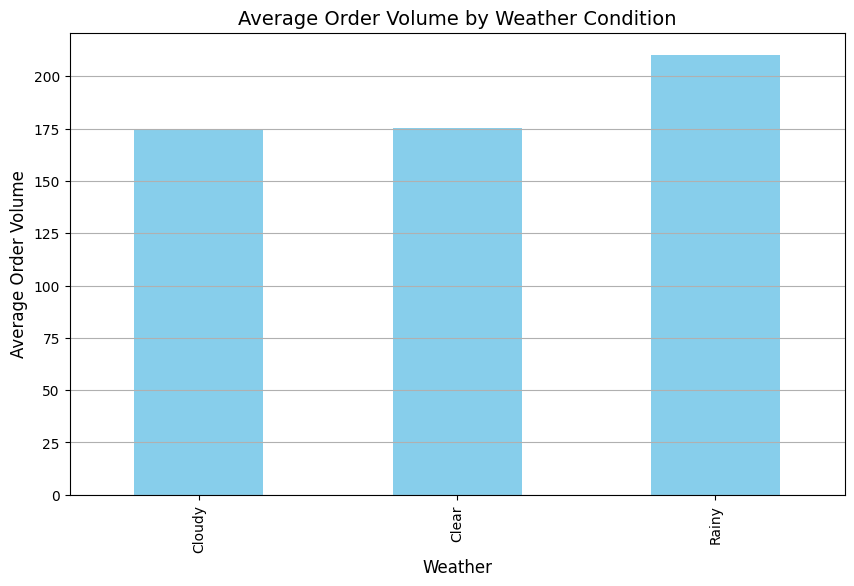

In [8]:
weather_data = product_data.groupby('Weather')['Order_Volume'].mean().sort_values()
plt.figure(figsize=(10, 6))
weather_data.plot(kind='bar', color='skyblue')
plt.title('Average Order Volume by Weather Condition', fontsize=14)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Average Order Volume', fontsize=12)
plt.grid(axis='y')
plt.show()

### 4.2 Impact of Traffic on Order Volume

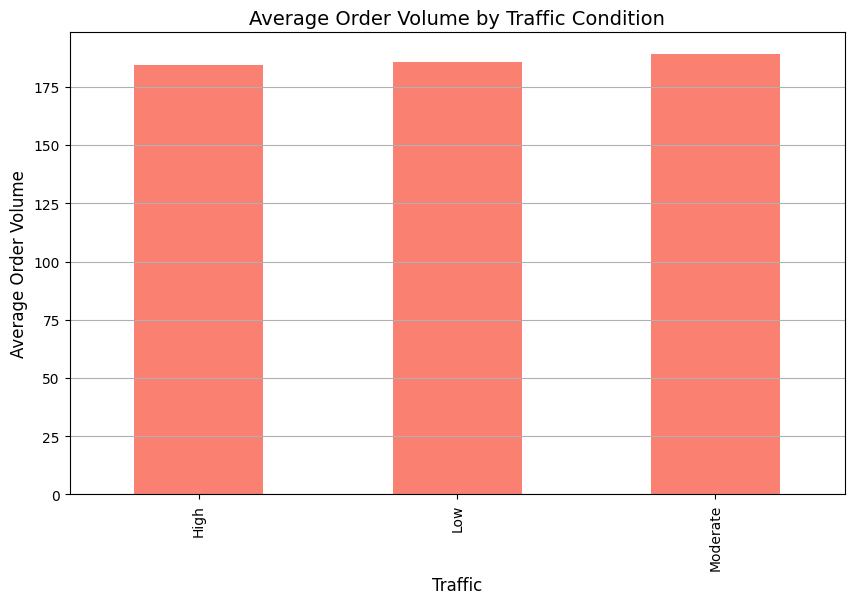

In [9]:
traffic_data = product_data.groupby('Traffic')['Order_Volume'].mean().sort_values()
plt.figure(figsize=(10, 6))
traffic_data.plot(kind='bar', color='salmon')
plt.title('Average Order Volume by Traffic Condition', fontsize=14)
plt.xlabel('Traffic', fontsize=12)
plt.ylabel('Average Order Volume', fontsize=12)
plt.grid(axis='y')
plt.show()

### 4.3 Impact of Promotions on Order Volume

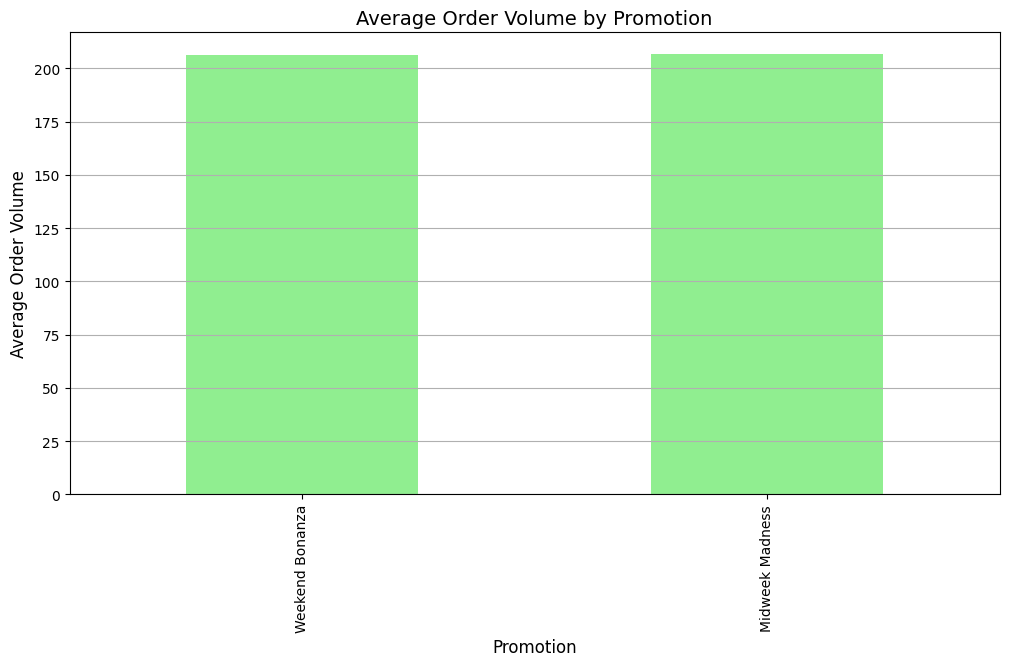

In [10]:
promotion_data = product_data.groupby('Promotion')['Order_Volume'].mean().sort_values()
plt.figure(figsize=(12, 6))
promotion_data.plot(kind='bar', color='lightgreen')
plt.title('Average Order Volume by Promotion', fontsize=14)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Average Order Volume', fontsize=12)
plt.grid(axis='y')
plt.show()

## Step 5: Conclusions

1. The time series plot reveals clear weekly seasonality, with significant peaks during specific hours and days.
2. Seasonal decomposition confirms the presence of strong seasonality and a stable trend component.
3. Weather, traffic, and promotions significantly impact order volume:
   - **Rainy weather** leads to higher order volumes.
   - **Moderate traffic** correlates with the highest orders.
   - Promotions like 'Weekend Bonanza' significantly boost demand.

This exploratory analysis provides valuable insights for planning and decision-making.